In [118]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from src.model.linear_state_space_model import StateSpace
from src.simulation.simulator import Simulator


plt.rcParams['text.usetex'] = True

# Inverted pendulum example. Pendulum on movable cart. 
# x denotes cart position and phi is pendulum angle
# Model from (http://www.ece.ualberta.ca/~tchen/ctm/examples/pend/digINVSS.html)
# States:
# [x, xdot, phi, phidot]
 
A = np.array([[1, 0.01, 0.0001, 0],
              [0, 0.9982, 0.0267, 0.0001],
              [0, 0, 1.0016, 0.01],
              [0, -0.0045, 0.3119, 1.0016]])
B = np.array([[0.0001], [0.0182], [0.0002], [0.0454]])
C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])
N = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, 1]])

# Example process and measurement noise covariances.
Q = 1e-2 * np.eye(2)
R = 0.25 * np.eye(2)

test_model = StateSpace(A, B, C, N, Q, R, 0.01)

x_0 = np.array([[5], [0.5], [-1.57], [0]])
p_0 = np.eye(4)

q_matrix = np.array([[5000, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0, 0, 100, 0],
                     [0, 0, 0, 0]])
r_matrix = np.array([[1]])

reference_value = np.array([[0], [-1.57]])

m_matrix = C
delta_t = 0.01

simulator = Simulator(test_model, x_0, p_0, q_matrix, r_matrix, reference_value, m_matrix, delta_t)

In [119]:
initial_state = np.array([[3], [2]])

states, output, estimated_states, inputs, t = simulator.simulate(x_0, 5)


In [120]:
simulator.lqr_controller.get_lqr_gains()

array([[-61.98362999, -33.37185012,  95.4404424 ,  18.89105843]])

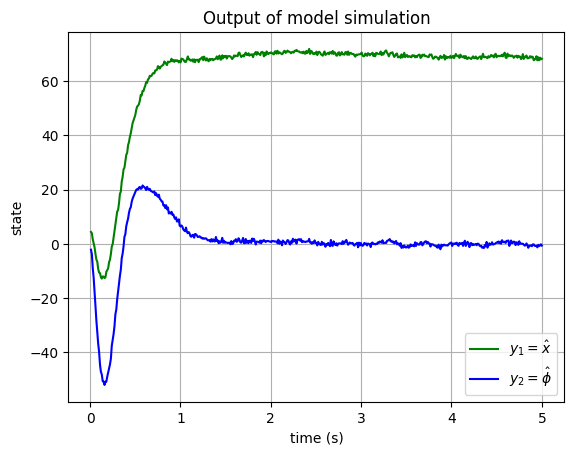

In [121]:
mpl.rcParams.update(mpl.rcParamsDefault)
# plt.rcParams['text.usetex'] = True
plt.plot(t[1:], output[0,:], 'g-', label="$y_1 = \hat{x}$")
# plt.plot(t[1:], estimated_states[0,:], 'g-', label="$\hat{x}$")

plt.plot(t[1:], output[1,:], 'b-', label="$y_2 = \hat{\phi}$")
# plt.plot(t[1:], estimated_states[2,:], 'b-', label="$\hat{\phi}$")

plt.grid(True)
plt.xlabel("time (s)")
plt.ylabel("state")
plt.title("Output of model simulation")
plt.legend()
plt.show()


In [122]:
import pandas as pd
data = {"t": t[1: ],
        "x": output[0, :],
        "phi": output[1, :]}

data = pd.DataFrame(data)
data.to_csv("example_data.csv", index=False)

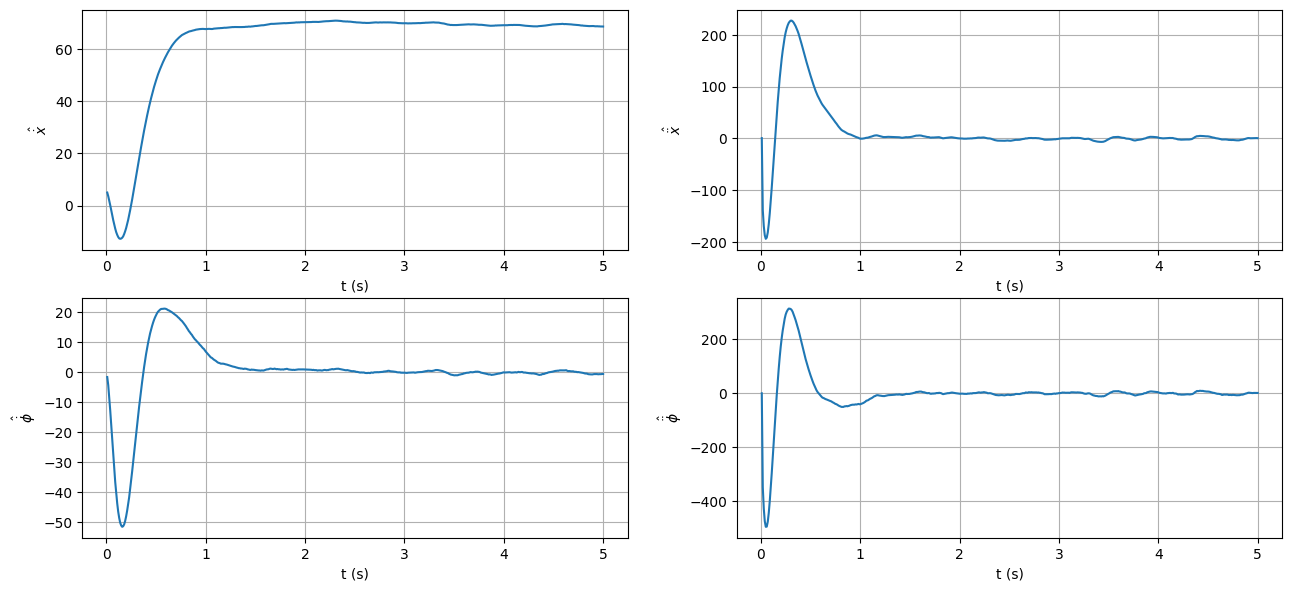

In [123]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(bottom=0.4, right=2, top=1.5)
plt.grid(True)
axs[0, 0].plot(t[1:], estimated_states[0,:])
axs[0, 1].plot(t[1:], estimated_states[1,:])
axs[1, 0].plot(t[1:], estimated_states[2,:])
axs[1, 1].plot(t[1:], estimated_states[3,:])

state_names = ['$\hat{x}$', '$\hat{\dot{x}}$', '$\hat{\phi}$', '$\hat{\dot{\phi}}$']
axis = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
for ax, name in zip(axis, state_names):
    ax.grid(True)
    ax.set(xlabel='t (s)', ylabel=name)
    
axs[0, 0].set(xlabel='t (s)', ylabel='$\hat{\dot{x}}$')
axs[0, 1].set(xlabel='t (s)', ylabel='$\hat{\ddot{x}}$')
axs[1, 0].set(xlabel='t (s)', ylabel='$\hat{\dot{\phi}}$')
axs[1, 1].set(xlabel='t (s)', ylabel='$\hat{\ddot{\phi}}$')

plt.show()

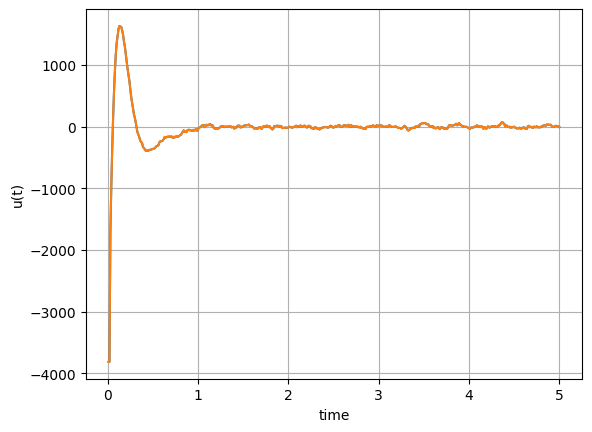

In [124]:
plt.plot(t[1:], inputs.T)
plt.grid(True)
plt.xlabel("time")
plt.ylabel("u(t)")
plt.show()

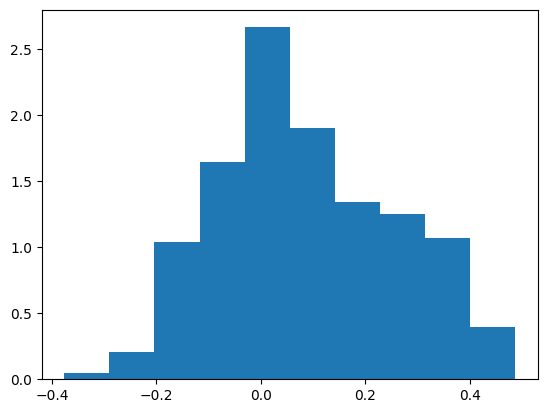

In [125]:
error = states[:, 1:] - estimated_states
_ = plt.hist(error[0,:], density=True)
plt.show()

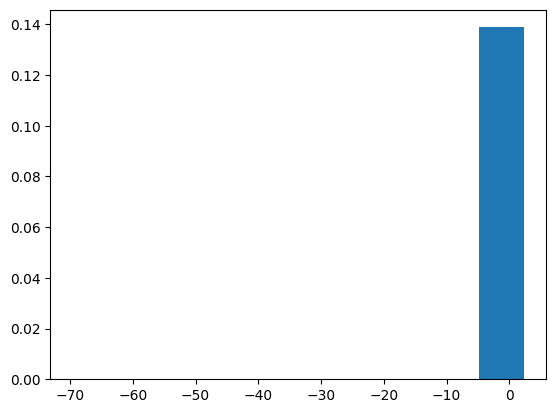

In [126]:
_ = plt.hist(error[1,:], density=True)
plt.show()